In [ ]:
!pip3 install jupyter_contrib_nbextensions && jupyter contrib nbextension install 

    100% |████████████████████████████████| 20.9MB 75kB/s eta 0:00:0111
    100% |████████████████████████████████| 481kB 426kB/s ta 0:00:011
    100% |████████████████████████████████| 870kB 383kB/s ta 0:00:01
    100% |████████████████████████████████| 276kB 442kB/s ta 0:00:011
    100% |████████████████████████████████| 9.0MB 184kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/e6/25/6ffb0f6e57fa6ef5d2f814377133b361b42a6dd39105f4885a4f1666c2c3/jupyter_core-4.5.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 491kB 2.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/93/d6/abcb22de61d78e2fc3959c964628a5771e47e7cc60d53e9342e21ed6cc9a/traitlets-4.3.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c69a/ipython_genutils-0.2.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 5.8MB 204kB/s ta 0:00:011
  Using cached https:/

    100% |████████████████████████████████| 61kB 4.3MB/s ta 0:00:011
    100% |████████████████████████████████| 1.0MB 450kB/s ta 0:00:01
    9% |███                             | 30kB 7.7MB/s eta 0:00:011

# The Metropolitan Museum of Art Open Access

you can download the dataset form kaggle [here](https://www.kaggle.com/metmuseum/the-metropolitan-museum-of-art-open-access)

### About

- The Metropolitan Museum of Art presents over **5,000 years** of art from around the world for everyone to experience and enjoy.
- you can access their webpage from [here](https://www.metmuseum.org/art/collection)
- We are going to Perform Exploratory Data Analysis to get some insigts form this like
 -  From which Department we have more no of paintings?
 -  How many Art works are in the public domain?
 -  Who is presenting all these Artworks?
 -  Type of Artwork that are more in presentation?
 -  What are the cultures that these Artworks are from?
 -  Which culture has highest no of Artworks?
 -  Who has more role in this Artworks?
 -  Which artist has more Artworks?
 -  From which country we had more artists?

### libraries import

In [1]:
%%timeit
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

The slowest run took 2851.06 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 206 µs per loop


In [2]:
#loading data into variable
data = pd.read_csv('MetObjects.csv')

In [3]:
data.head()#shows first 5 rows

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


### initial observation: 
we have more null values in data

## Some stats

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448203 entries, 0 to 448202
Data columns (total 43 columns):
Object Number              448203 non-null object
Is Highlight               448203 non-null bool
Is Public Domain           448203 non-null bool
Object ID                  448203 non-null int64
Department                 448203 non-null object
Object Name                445568 non-null object
Title                      416906 non-null object
Culture                    186518 non-null object
Period                     71882 non-null object
Dynasty                    23018 non-null object
Reign                      10817 non-null object
Portfolio                  20370 non-null object
Artist Role                259909 non-null object
Artist Prefix              88928 non-null object
Artist Display Name        261111 non-null object
Artist Display Bio         224064 non-null object
Artist Suffix              10212 non-null object
Artist Alpha Sort          261088 non-null object


This data.info() gives you the **column values, no.of.rows, Memory size** and their **data types**. you can even get the **data types** by typing data.dtypes.

### observation:-
- we have 43 columns and 448203, ranging from 0 to 448202.
- we have more than half of the columns with missing values.
- 2 columns have boolean, 3 columns have integer, 38 columns have object data type.

In [5]:
#gets the rows&cols
data.shape

(448203, 43)

this says we have 448203 rows and 43 columns.

In [6]:
#all columns
data.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository'],
      dtype='object')

Here we have list of the columns used in dataset.

In [7]:
#stats description
data.describe()

,Object ID,Object Begin Date,Object End Date
count,448203.000000,4.482030e+05,4.482030e+05
mean,346272.873187,1.390817e+03,1.493446e+03
std,206914.987003,2.779816e+04,2.778712e+04
min,1.000000,-9.500000e+04,-3.500000e+04
25%,198808.500000,1.567000e+03,1.600000e+03
50%,349816.000000,1.800000e+03,1.850000e+03
75%,481764.500000,1.895000e+03,1.910000e+03
max,750830.000000,1.859186e+07,1.859186e+07


this describing the columns with int data type with **count,Mean(average),Min(minimum),Max(maximum),Std(Standard-deviation) and percentiles**.

### Missing values

In [8]:
#missing values
data.isna().sum()

Object Number                   0
Is Highlight                    0
Is Public Domain                0
Object ID                       0
Department                      0
Object Name                  2635
Title                       31297
Culture                    261685
Period                     376321
Dynasty                    425185
Reign                      437386
Portfolio                  427833
Artist Role                188294
Artist Prefix              359275
Artist Display Name        187092
Artist Display Bio         224139
Artist Suffix              437991
Artist Alpha Sort          187115
Artist Nationality         252071
Artist Begin Date          232969
Artist End Date            235378
Object Date                 15594
Object Begin Date               0
Object End Date                 0
Medium                       8048
Dimensions                  62843
Credit Line                   670
Geography Type             389740
City                       417683
State         

This shows the **sum of missing values** in Dataset for each column

In [9]:
#view the missing values in ascending order
data.isna().sum().sort_values(ascending = False)

River                      446100
County                     445715
Locus                      441264
State                      439843
Artist Suffix              437991
Reign                      437386
Locale                     433108
Excavation                 432684
Portfolio                  427833
Subregion                  426487
Rights and Reproduction    425228
Dynasty                    425185
City                       417683
Region                     417125
Geography Type             389740
Period                     376321
Country                    373753
Artist Prefix              359275
Culture                    261685
Artist Nationality         252071
Artist End Date            235378
Artist Begin Date          232969
Artist Display Bio         224139
Artist Role                188294
Artist Alpha Sort          187115
Artist Display Name        187092
Dimensions                  62843
Classification              58279
Title                       31297
Object Date   

In [10]:
#lets view the columns that have more than 50% missing/NULL values.
data.isna().sum().sort_values(ascending = False).head(26)

River                      446100
County                     445715
Locus                      441264
State                      439843
Artist Suffix              437991
Reign                      437386
Locale                     433108
Excavation                 432684
Portfolio                  427833
Subregion                  426487
Rights and Reproduction    425228
Dynasty                    425185
City                       417683
Region                     417125
Geography Type             389740
Period                     376321
Country                    373753
Artist Prefix              359275
Culture                    261685
Artist Nationality         252071
Artist End Date            235378
Artist Begin Date          232969
Artist Display Bio         224139
Artist Role                188294
Artist Alpha Sort          187115
Artist Display Name        187092
dtype: int64

### Observation:-
- so we have **26 columns** as shown above which **have morethan 50% of data missing**, so we can drop them
- we can **drop them**, becuase we can not impute missing values as more than half of data is missing, so if we **impute it might show effect on Accuracy and on our model**.

In [11]:
data.isna().sum().sort_values(ascending = False).tail(17)

Dimensions           62843
Classification       58279
Title                31297
Object Date          15594
Medium                8048
Object Name           2635
Credit Line            670
Department               0
Object ID                0
Is Public Domain         0
Is Highlight             0
Repository               0
Metadata Date            0
Object Begin Date        0
Object End Date          0
Link Resource            0
Object Number            0
dtype: int64

so in these 17 columns, columns like **Dimensions,Classification,Title,Objectdate,Medium,Objectname,Creditline** have missing values where we **can impute**, and columns like **Department, Objectid, ispublicdomain, ishighlight, repository, metadatadate, objectbegindate, objectenddate, linkresource, objectnumber** have no missing values. 

### Data visualizations

univariate analysis

### Department

In [12]:
data['Department'].value_counts()

Drawings and Prints                          154445
European Sculpture and Decorative Arts        42528
Asian Art                                     36727
Photographs                                   36258
Costume Institute                             33681
Egyptian Art                                  27542
Greek and Roman Art                           17292
Islamic Art                                   15082
Modern and Contemporary Art                   13991
Arms and Armor                                13486
Arts of Africa, Oceania, and the Americas     12427
American Decorative Arts                      12330
Medieval Art                                   7343
Ancient Near Eastern Art                       6185
American Paintings and Sculpture               5451
Musical Instruments                            5303
European Paintings                             2760
The Cloisters                                  2628
Robert Lehman Collection                       2589
The Librarie

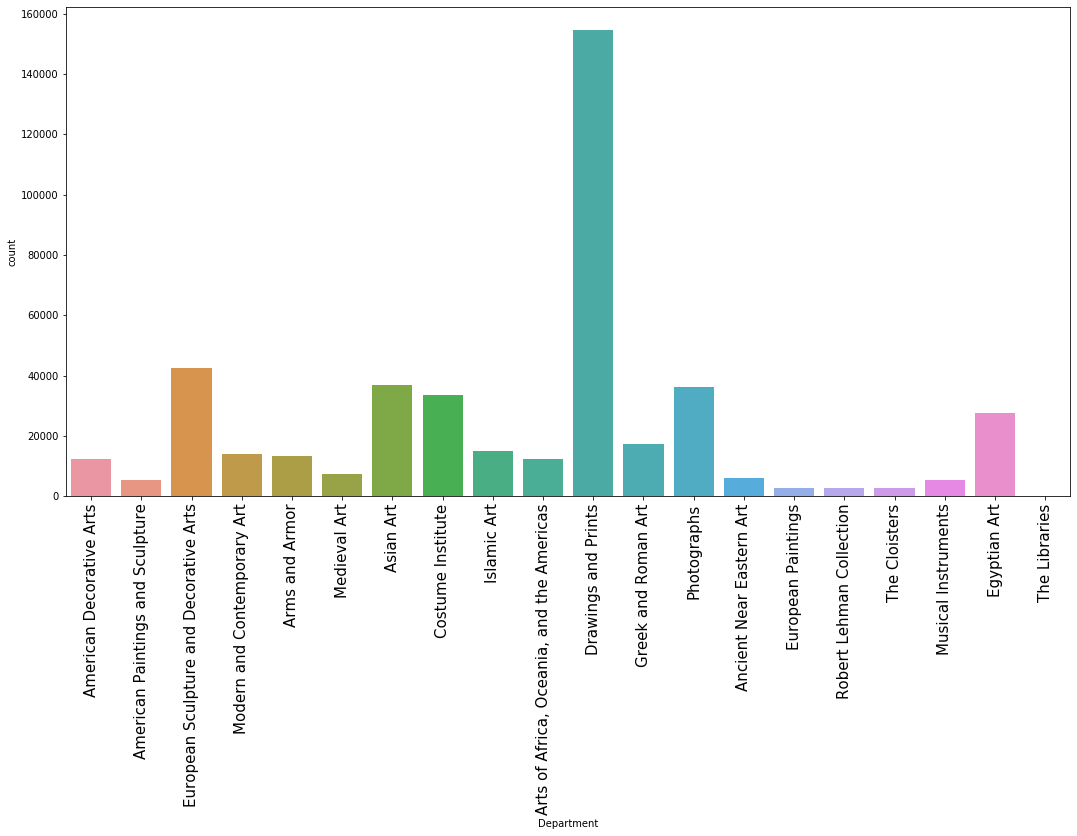

In [13]:
fig= plt.figure(figsize=(18, 9))
depplot = sns.countplot(data['Department'])
plt.xticks(rotation=90,fontsize = 15)

#to save graph to image
fig = depplot.get_figure()
fig.savefig("/home/purna/my_project_dir/Task1_musuemArt/department.png",bbox_inches='tight')

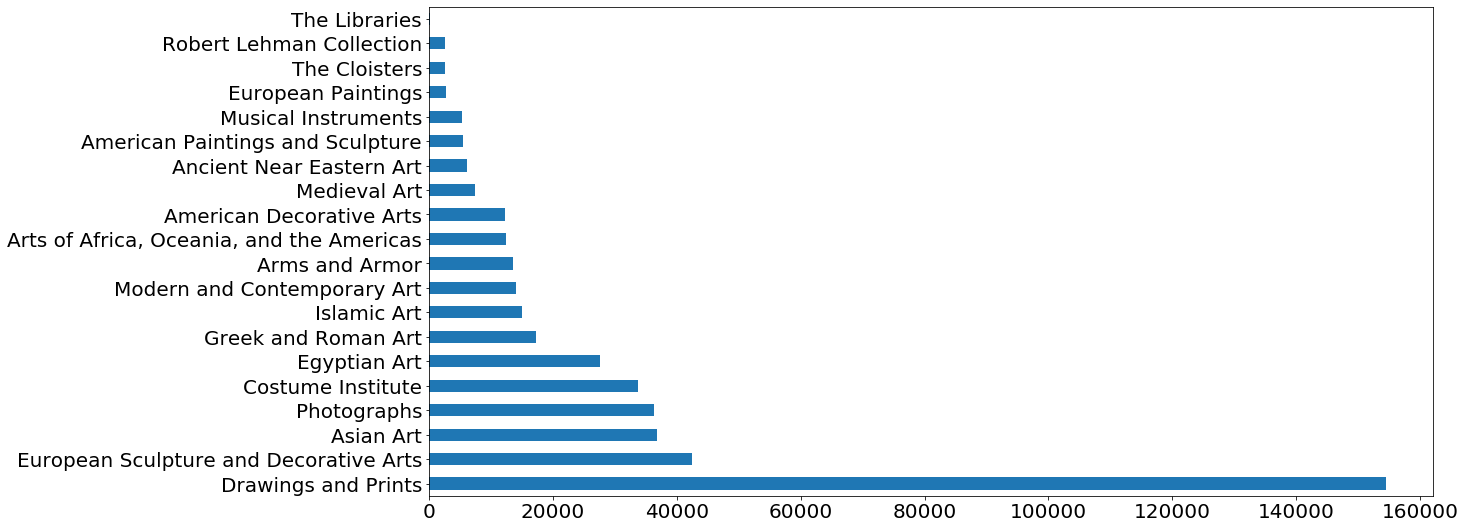

In [14]:
fig= plt.figure(figsize=(18, 9))
data['Department'].value_counts()[:20].plot(kind='barh',fontsize = 20)


### Observations
- we can rank them like below
  - 1st - Drawings and Prints
  - 2nd - European Sculpture and Decorative Arts
  - 3rd - Asian Art
  - 4th - Photograpbs
  - 5th - Costume institute
 
So most of them are from **Drawsings and Prints**.

### ObjectID

In [15]:
data['Object ID'].value_counts().sum()

448203

This says that **we have uniques values** in this columns as it is **ID**, so we have **no duplicates**.

### IsPublicDomain

In [16]:
data['Is Public Domain'].value_counts()

False    246004
True     202199
Name: Is Public Domain, dtype: int64

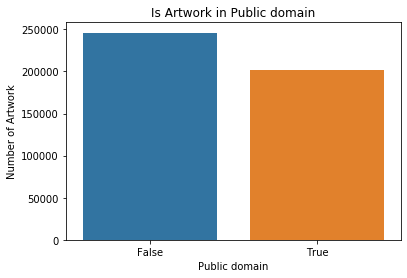

In [28]:
publicplot = sns.countplot(data['Is Public Domain'])
plt.xlabel('Public domain')
plt.ylabel("Number of Artwork")
plt.title('Is Artwork in Public domain')
#to save graph to image
fig = publicplot.get_figure()
fig.savefig("/home/purna/my_project_dir/Task1_musuemArt/publicdomain.png",bbox_inches='tight')


- so we have **202199** in **Public domain**.
- **246004** not in public domian

### Repository

In [22]:
data['Repository'].value_counts()[:]

Metropolitan Museum of Art, New York, NY    448203
Name: Repository, dtype: int64

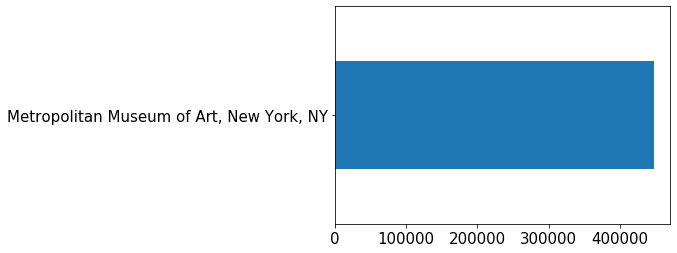

In [23]:
data['Repository'].value_counts()[:20].plot(kind='barh',fontsize = 15)

we have the only repository is **Metropolitan Museum of Art** with all data.

### Objectname

Text(0.5, 1.0, 'Number of Artwork vs Type of Artwork')

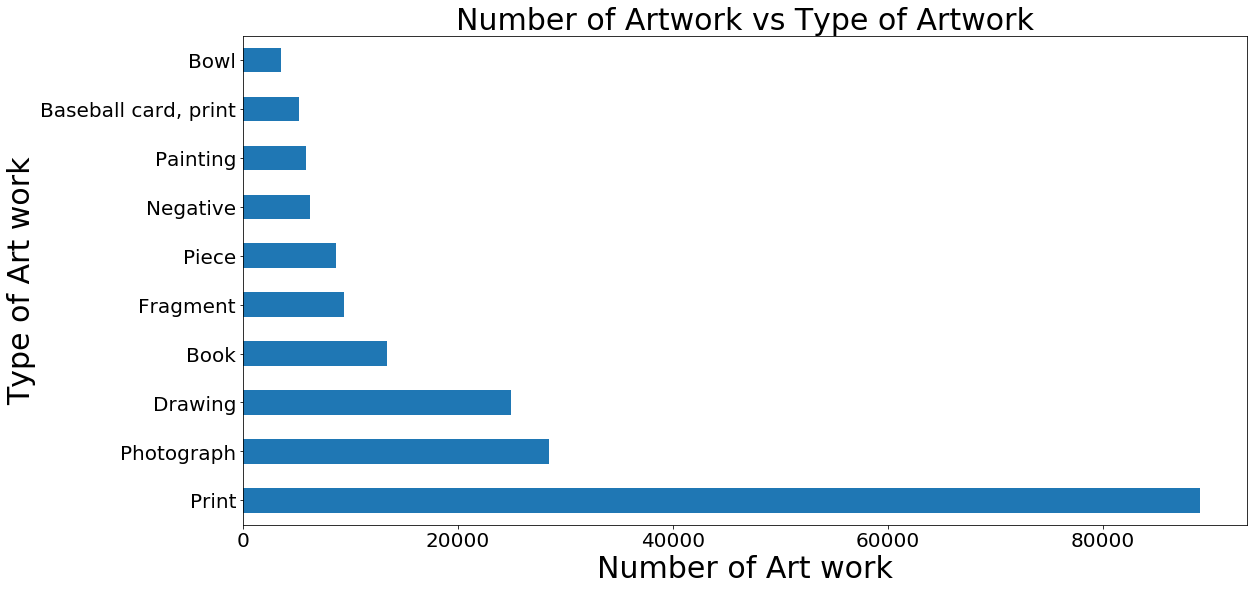

In [27]:
fig= plt.figure(figsize=(18, 9))
objplot = data['Object Name'].value_counts()[:10].plot(kind = 'barh',fontsize=20)
plt.xlabel('Number of Art work',fontsize = 30)
plt.ylabel('Type of Art work',fontsize = 30)
plt.title('Number of Artwork vs Type of Artwork',fontsize = 30)
#to save graph to image
#fig = objplot.get_figure()
#fig.savefig("/home/purna/my_project_dir/Task1_musuemArt/object.png",bbox_inches='tight')

we have most of the object names are 
- from **Print** keeping Photograph,drawing next.

### Culture

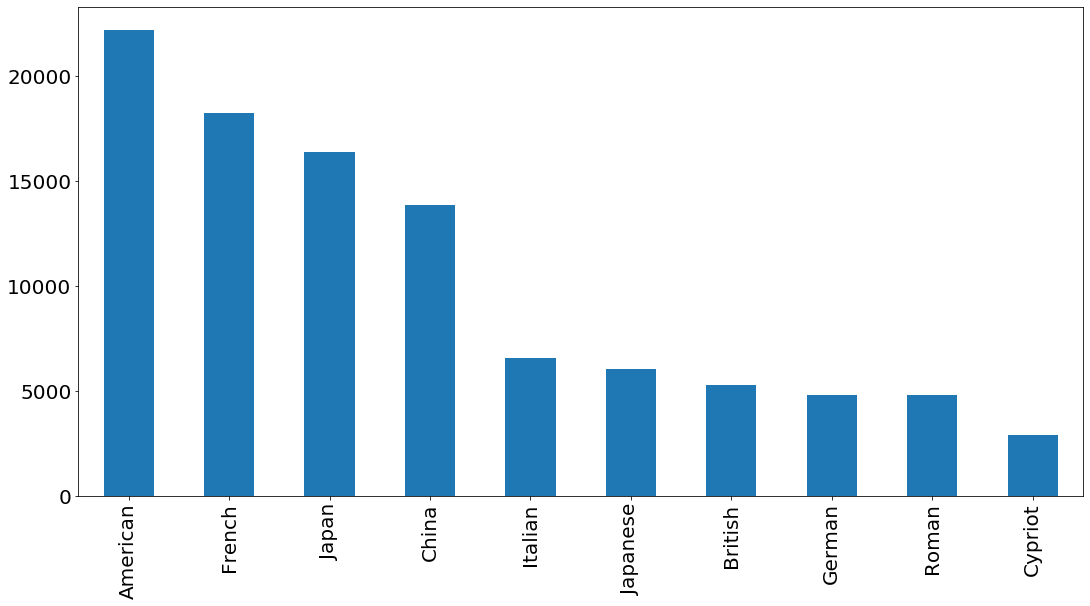

In [29]:
fig= plt.figure(figsize=(18, 9))
data['Culture'].value_counts()[:10].plot(kind = 'bar',fontsize=20 )



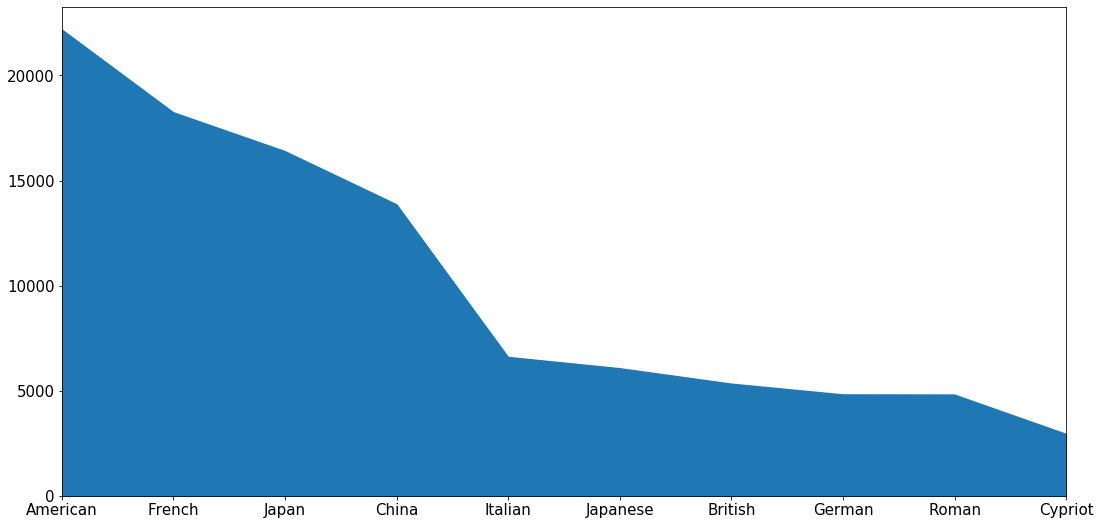

In [30]:
fig= plt.figure(figsize=(18, 9))
data['Culture'].value_counts()[:10].plot(kind = 'area',fontsize=15)

Text(0.5, 1.0, 'Percentage of Artwork of Every Culture')

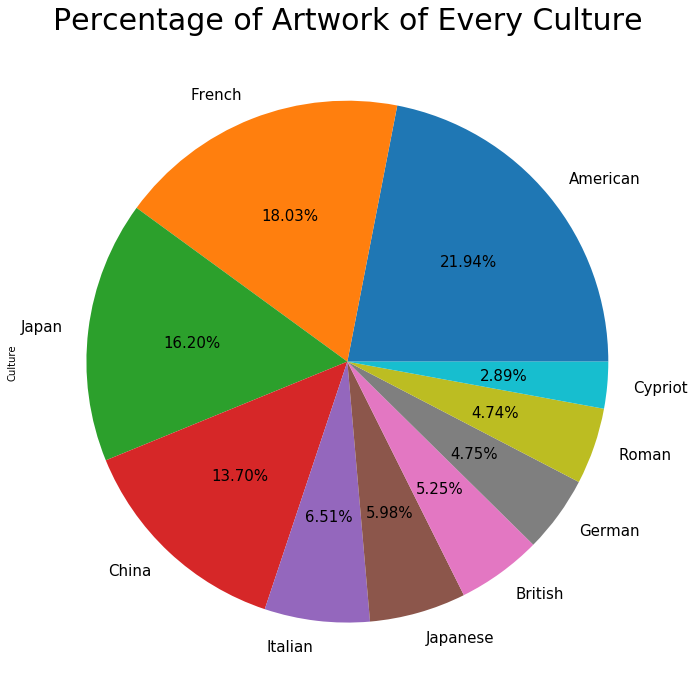

In [37]:
fig= plt.figure(figsize=(48, 12))

culplot = data['Culture'].value_counts()[:10].plot(kind = 'pie',autopct='%.2f%%',fontsize=15)
#plt.xlabel('Number of Art work',fontsize = 30)
#plt.ylabel('Type of Art work',fontsize = 30)
plt.title("Percentage of Artwork of Every Culture",fontsize = 30)


#to save graph to image
#fig = culplot.get_figure()
#fig.savefig("/home/purna/my_project_dir/Task1_musuemArt/culture.png",bbox_inches='tight')

from all the above graphs, you can say that
- we have **highest** art from **American**.
- **second** is from **French**
- **3rd** is from ***japan**

### Artist Role

In [48]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

In [49]:
hi = data['Artist Role'].unique()

In [52]:
data['Artist Role'].replace('Artist|Artist','Artist', inplace = True)
data['Artist Role'].replace('Artist|Publisher','Publisher', inplace = True)

Text(0.5, 1.0, 'Artworks vs Role or person')

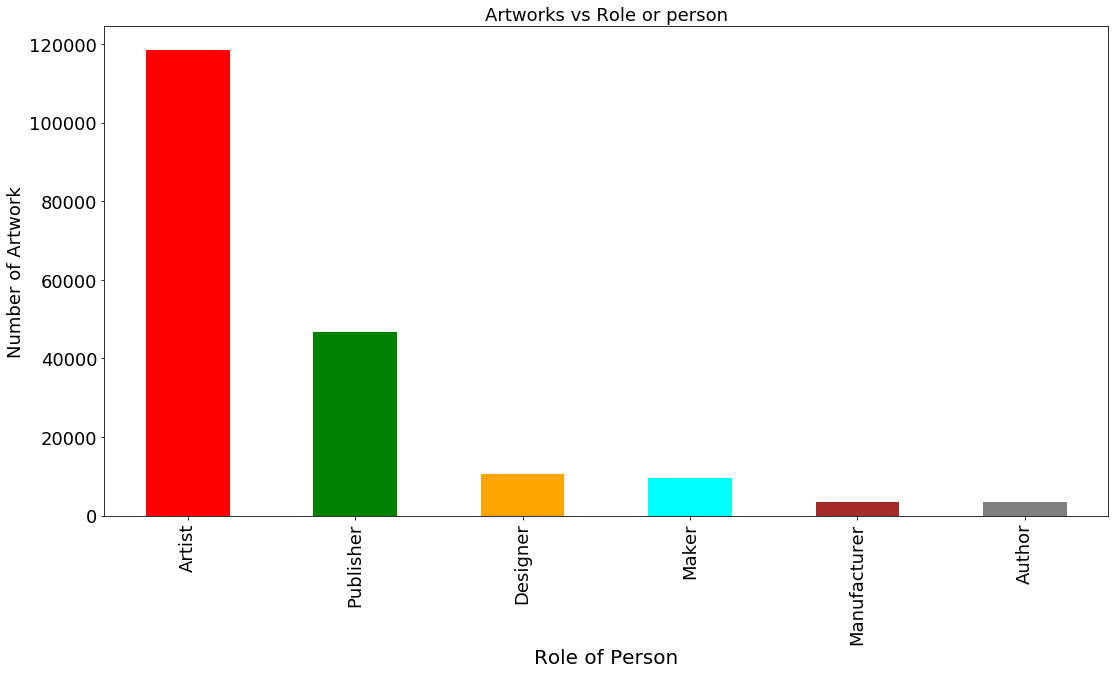

In [69]:
fig= plt.figure(figsize=(18, 9))
#explode = (0.1, 0, 0, 0) 
#artistplot = data['Artist Role'].value_counts()[:6].plot(kind = 'pie',autopct='%.2f%%',fontsize=20,shadow=True,colors = colors)
data['Artist Role'].value_counts()[:6].plot(kind = 'bar',fontsize=12,colors = colors)
plt.xlabel('Role of Person',fontsize = 20)
plt.xticks(fontsize  = 18)
plt.yticks(fontsize  = 18)
plt.ylabel('Number of Artwork',fontsize  = 18)
plt.title('Artworks vs Role or person',fontsize  = 18)


#draw circle
#centre_circle = plt.Circle((0,0),0.80,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)


#to save graph to image
#fig = artistplot.get_figure()
#fig.savefig("/home/purna/my_project_dir/Task1_musuemArt/artist.png",bbox_inches='tight')

Most of the artists play a role of 
 - Artist -1st
 - Publisher - 2nd

### Artist Display Name

In [78]:
colors = ['#800080','#000080','#00FFFF','#FFFF00','#00FF00','#FF00FF']

Text(0.5, 1.0, 'Artworks vs Role or person')

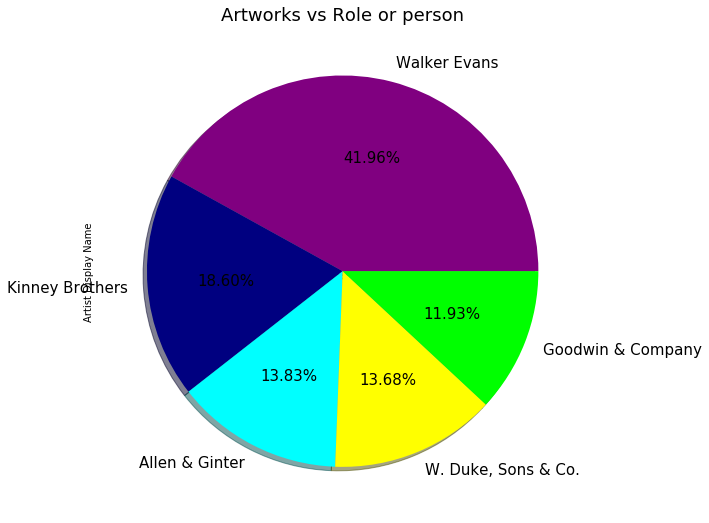

In [75]:
fig= plt.figure(figsize=(24, 9))
Displot = data['Artist Display Name'].value_counts().head(5).plot(kind = 'pie',colors = colors,autopct='%.2f%%',fontsize=15,shadow=True)

plt.title('Artworks vs Role or person',fontsize  = 18)

#to save graph to image
#fig = Displot.get_figure()
#fig.savefig("/home/purna/my_project_dir/Task1_musuemArt/Artistname.png",bbox_inches='tight')

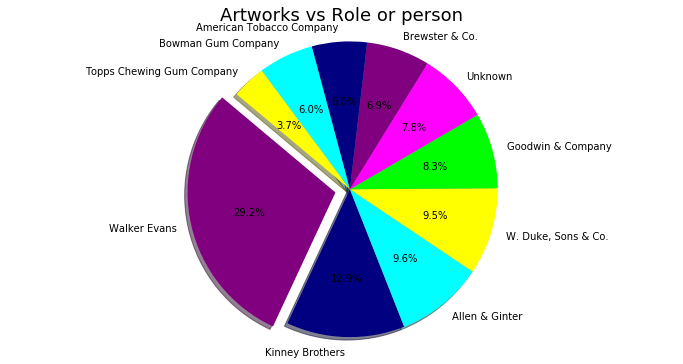

In [83]:
# Data to plot
plt.figure(figsize= (12,6))
labels = data['Artist Display Name'].value_counts()[:10].index
sizes = data['Artist Display Name'].value_counts()[:10].values
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Artworks vs Role or person',fontsize  = 18)
plt.axis('equal')
plt.show()

we have more of the Art from the Artist **Walker Evans**, with **Kinney brothers** in second palce.

### Country

In [84]:
data['Country'].value_counts().head(15)

Egypt               30914
United States        8501
Iran                 5886
Peru                 3422
Byzantine Egypt      1673
France               1670
Mexico               1537
India                1440
Indonesia            1394
England              1059
China                 918
Germany               888
Papua New Guinea      851
Turkey                826
Nigeria               637
Name: Country, dtype: int64

Text(0.5, 1.0, 'Artworks vs Role or person')

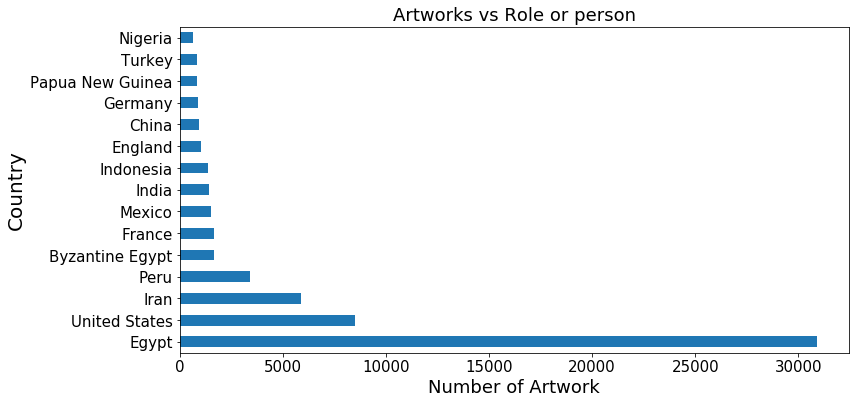

In [86]:
plt.figure(figsize = (12,6))
couplot = data['Country'].value_counts()[:15].plot(kind='barh',fontsize =15)
plt.ylabel('Country',fontsize = 20)

plt.xlabel('Number of Artwork',fontsize  = 18)
plt.title('Artworks vs Role or person',fontsize  = 18)

#to save graph to image
#fig = couplot.get_figure()
#fig.savefig("/home/purna/my_project_dir/Task1_musuemArt/country.png",bbox_inches='tight')



So its clear that we have **most of the art** from in rankings is 
- Egypt
- Unites States
- Iran

### Heatmap

Bivariate analysis

In [ ]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True)
plt.xticks(fontsize = 15)
plt.yticks(rotation = 0,fontsize =15)

so here we can see that we have more **correlation between the variables** are
- Object beign Date & object End Date.


## Final observation

- most of the ART are from **Drawsings and Prints**.
- ObjectID is **unique**(no duplicates)
- we have 202199 art works in **Public** domain.
- Most of the art work is in **Print** format.
- we have the highest art work from **American** and **French**.
- Most of the art work is purely from **Artists**.
- we have more of the Art from the **Artist Walker Evans**, with **Kinney brothers in second palce**.
- we have most of the art from the country **Egypt**.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
